# Statistical NLP Project 


# Part 1

• DOMAIN: Digital content management


• CONTEXT: Classification is probably the most popular task that you would deal with in real life. Text in the form of blogs, posts, articles,
etc. is written every second. It is a challenge to predict the information about the writer without knowing about him/her. We are going to
create a classifier that predicts multiple features of the author of a given text. We have designed it as a Multi label classification problem.


• DATA DESCRIPTION: Over 600,000 posts from more than 19 thousand bloggers The Blog Authorship Corpus consists of the collected
posts of 19,320 bloggers gathered from blogger.com in August 2004. The corpus incorporates a total of 681,288 posts and over 140 million
words - or approximately 35 posts and 7250 words per person. Each blog is presented as a separate file, the name of which indicates a
blogger id# and the blogger’s self-provided gender, age, industry, and astrological sign. (All are labelled for gender and age but for many,
industry and/or sign is marked as unknown.) All bloggers included in the corpus fall into one of three age groups:
• 8240 "10s" blogs (ages 13-17),
• 8086 "20s" blogs(ages 23-27) and
• 2994 "30s" blogs (ages 33-47)
For each age group, there is an equal number of male and female bloggers.
Each blog in the corpus includes at least 200 occurrences of common English words. All formatting has been stripped with two exceptions.
Individual posts within a single blogger are separated by the date of the following post and links within a post are denoted by the label url
link. Link to dataset: https://www.kaggle.com/rtatman/blog-authorship-corpus


• PROJECT OBJECTIVE: The need is to build a NLP classifier which can use input text parameters to determine the label/s of of the blog.
Steps and tasks:
1. Import and analyse the data set.
2. Perform data pre-processing on the data:
• Data cleansing by removing unwanted characters, spaces, stop words etc. Convert text to lowercase.
• Target/label merger and transformation
• Train and test split
• Vectorisation, etc.
3. Design, train, tune and test the best text classifier.
4. Display and explain detail the classification report
5. Print the true vs predicted labels for any 5 entries from the dataset.

In [1]:
# Importing the relevant libraries
import pandas as pd
import re
import numpy as np
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import warnings
from nltk.stem.snowball import SnowballStemmer
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib as plt
%matplotlib inline
import os


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sbhattacharjee\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [4]:
#from google.colab import drive
#drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
pwd

'/content'

In [6]:
# change the current directory
# to specified directory
os.chdir(r"/content/drive/MyDrive/Statistical NLP Project")
  
print("Directory changed")

Directory changed


In [2]:
blog_df = pd.read_csv('Dataset - blogtext.csv', encoding = 'utf-8')

In [3]:
blog_df.shape

(681284, 7)

In [4]:
blog_df.sample(5)

,id,gender,age,topic,sign,date,text
225264,3691053,male,14,Student,Aquarius,"21,June,2004",today...i end my day with a very sa...
379894,3110819,female,15,Student,Libra,"16,June,2004",wow...so many things have happened late...
248419,941330,male,17,Student,Taurus,"19,April,2003",today was cool...went to century 25...
206436,3455888,female,25,Education,Aries,"20,June,2004",well...is it possible to have one of yo...
28957,597870,female,33,Internet,Taurus,"17,July,2003",I really want to do a roadtrip ou...


In [5]:
blog_df_1 = pd.read_csv('Dataset - blogtext.csv', encoding = 'utf-8', nrows=100000)

In [6]:
blog_df_1.shape

(100000, 7)

In [7]:
blog_df_1.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [8]:
blog_df_1.tail()

,id,gender,age,topic,sign,date,text
99995,1709399,male,27,Student,Virgo,"18,September,2003",THE HINDU - 125 YEARS ...
99996,1709399,male,27,Student,Virgo,"16,September,2003",DILBERT & IIT-ans ...
99997,1709399,male,27,Student,Virgo,"12,September,2003",Case Study : How HP won $3 billion...
99998,1709399,male,27,Student,Virgo,"09,September,2003",Championing Chennai ...
99999,1709399,male,27,Student,Virgo,"05,September,2003",WEEKEND It...


In [9]:
blog_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      100000 non-null  int64 
 1   gender  100000 non-null  object
 2   age     100000 non-null  int64 
 3   topic   100000 non-null  object
 4   sign    100000 non-null  object
 5   date    100000 non-null  object
 6   text    100000 non-null  object
dtypes: int64(2), object(5)
memory usage: 5.3+ MB


In [10]:
blog_df_1.gender.value_counts()

male      53358
female    46642
Name: gender, dtype: int64

In [11]:
#Check for NA values
blog_df_1.isna().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

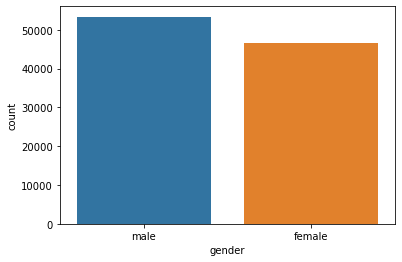

In [12]:
sns.countplot(x='gender',data=blog_df_1)

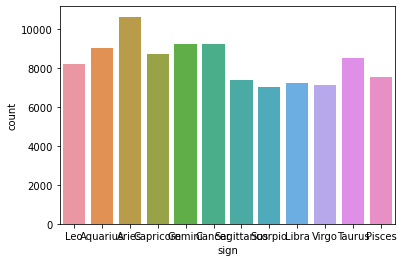

In [13]:
sns.countplot(x='sign',data=blog_df_1)

In [14]:
#Check for null values
blog_df_1.isnull().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

In [15]:
# remove unwanted chars other than alphanumeric
pattern = "[^\w ]"
blog_df_1.text = blog_df_1.text.apply(lambda s : re.sub(pattern,"",s))

In [16]:
blog_df_1.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",Info has been found 100 pages and ...
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members Drewes...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoos Toolbar I can no...


In [17]:
#Convert the texts to lower case
blog_df_1.text = blog_df_1.text.apply(lambda s : s.lower())

In [18]:
blog_df_1.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",info has been found 100 pages and ...
1,2059027,male,15,Student,Leo,"13,May,2004",these are the team members drewes...
2,2059027,male,15,Student,Leo,"12,May,2004",in het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks to yahoos toolbar i can no...


In [19]:
#remove unwanted spaces
blog_df_1.text = blog_df_1.text.apply(lambda s: s.strip())

In [20]:
blog_df_1.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",info has been found 100 pages and 45 mb of pd...
1,2059027,male,15,Student,Leo,"13,May,2004",these are the team members drewes van der la...
2,2059027,male,15,Student,Leo,"12,May,2004",in het kader van kernfusie op aarde maak je e...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks to yahoos toolbar i can now capture the...


In [21]:
#remove stopwords
stopwords=set(stopwords.words('english'))

In [22]:
blog_df_1.text = blog_df_1.text.apply(lambda t: ' '.join([words for words in t.split() if words not in stopwords]) )

In [23]:
blog_df_1.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",info found 100 pages 45 mb pdf files wait unti...
1,2059027,male,15,Student,Leo,"13,May,2004",team members drewes van der laag urllink mail ...
2,2059027,male,15,Student,Leo,"12,May,2004",het kader van kernfusie op aarde maak je eigen...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks yahoos toolbar capture urls popupswhich...


In [24]:
# drop id and date columns
blog_df_1.drop(labels=['id','date'], axis=1,inplace=True)

In [25]:
blog_df_1.head()

,gender,age,topic,sign,text
0,male,15,Student,Leo,info found 100 pages 45 mb pdf files wait unti...
1,male,15,Student,Leo,team members drewes van der laag urllink mail ...
2,male,15,Student,Leo,het kader van kernfusie op aarde maak je eigen...
3,male,15,Student,Leo,testing testing
4,male,33,InvestmentBanking,Aquarius,thanks yahoos toolbar capture urls popupswhich...


In [26]:
blog_df_1['labels'] = blog_df_1.apply(lambda col : [col['gender'],col['age'],col['topic'],col['sign']], axis=1)

In [27]:
blog_df_1.head()

,gender,age,topic,sign,text,labels
0,male,15,Student,Leo,info found 100 pages 45 mb pdf files wait unti...,"[male, 15, Student, Leo]"
1,male,15,Student,Leo,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,male,15,Student,Leo,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,male,15,Student,Leo,testing testing,"[male, 15, Student, Leo]"
4,male,33,InvestmentBanking,Aquarius,thanks yahoos toolbar capture urls popupswhich...,"[male, 33, InvestmentBanking, Aquarius]"


In [28]:
#drop  gender,age,topic & sign as they are already merged to labels column
blog_df_1.drop(columns=['gender','age','topic','sign'], axis=1, inplace=True)

In [29]:
blog_df_1.head()

,text,labels
0,info found 100 pages 45 mb pdf files wait unti...,"[male, 15, Student, Leo]"
1,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,testing testing,"[male, 15, Student, Leo]"
4,thanks yahoos toolbar capture urls popupswhich...,"[male, 33, InvestmentBanking, Aquarius]"


### Separate features and labels, and split the data into training and testing

In [30]:
X= blog_df_1.text
y = blog_df_1.labels

In [31]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2,test_size = 0.2)

In [32]:
print(X_train.shape)
print(y_train.shape)

(80000,)
(80000,)


In [33]:
print(X_test.shape)
print(y_test.shape)

(20000,)
(20000,)


In [34]:
X_test

6448                      bird buries head mashed potatoes
50680    ok seriously ruined day like mad right wouldnt...
814      astro vs braves got back minute maid stadium d...
20354    greetings welcome first ever blog concept behi...
49224    walks door room always brightens perfect figur...
                               ...                        
47661    hey cool jo problem understandable sounds lots...
56256    last night went see new harry potter movie hon...
92555    urllink instant messages come bearing malice i...
36328    srajan gamers sections class 8th entered compu...
73345    monqiue got back together wasnt quite dramatic...
Name: text, Length: 20000, dtype: object

### Vectorize the features

     Create a bag of words using Count Vectorizer
     Vectorize the train and test set
     Get the DTM

In [35]:
cv = CountVectorizer(ngram_range=(1,2))

In [36]:
cv.fit(X_train)

CountVectorizer(ngram_range=(1, 2))

In [37]:
len(cv.vocabulary_)

4517090

In [38]:
cv.get_feature_names()

['00',
 '00 damarcus',
 '00 damn',
 '00 doesnt',
 '00 dont',
 '00 draw',
 '00 games',
 '00 laughed',
 '00 lil',
 '00 morning',
 '00 really',
 '00 silver',
 '00 sometimes',
 '00 soooooo',
 '00 sq',
 '00 tcr1',
 '00 tie',
 '00 uppercase_75_100',
 '00 watch',
 '00 well',
 '000',
 '000 address',
 '000 available',
 '000 best',
 '000 calories',
 '000 cheaper',
 '000 comptes',
 '000 could',
 '000 duration',
 '000 et',
 '000 first',
 '000 ft',
 '000 fulltime',
 '000 good',
 '000 heh',
 '000 leaving',
 '000 nothing',
 '000 odd',
 '000 people',
 '000 pounds',
 '000 rupees',
 '000 seats',
 '000 sec',
 '000 seems',
 '000 straight',
 '000 subject',
 '000 thats',
 '000 years',
 '000 yen',
 '0000',
 '0000 arent',
 '0000 blinking',
 '0000 hopefully',
 '0000 hrs',
 '0000 new',
 '0000 showed',
 '0000 still',
 '0000 subject',
 '000000',
 '000000 flickrframe',
 '000000 fontfamily',
 '000000 zero',
 '000000000000000000000000167',
 '000000000000000000000000167 grams',
 '000000000000000000000section',
 '0000

In [39]:
X_train_ct = cv.transform(X_train)

In [40]:
type(X_train_ct)

scipy.sparse.csr.csr_matrix

In [41]:
X_train_ct

<80000x4517090 sparse matrix of type '<class 'numpy.int64'>'
	with 13894625 stored elements in Compressed Sparse Row format>

In [42]:
X_train_ct[0]

<1x4517090 sparse matrix of type '<class 'numpy.int64'>'
	with 483 stored elements in Compressed Sparse Row format>

In [43]:
X_test_ct = cv.transform(X_test)

In [44]:
X_test_ct

<20000x4517090 sparse matrix of type '<class 'numpy.int64'>'
	with 2633973 stored elements in Compressed Sparse Row format>

In [45]:
X_test_ct[0]

<1x4517090 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [46]:
cv.get_feature_names()[:10]

['00',
 '00 damarcus',
 '00 damn',
 '00 doesnt',
 '00 dont',
 '00 draw',
 '00 games',
 '00 laughed',
 '00 lil',
 '00 morning']

In [47]:
label_counts=dict()

for labels in blog_df_1.labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[str(label)]+=1
        else:
            label_counts[str(label)]=1

label_counts

{'male': 53358,
 '15': 1,
 'Student': 22122,
 'Leo': 8230,
 '33': 1,
 'InvestmentBanking': 244,
 'Aquarius': 9050,
 'female': 46642,
 '14': 1,
 'indUnk': 33097,
 'Aries': 10637,
 '25': 1,
 'Capricorn': 8723,
 '17': 1,
 'Gemini': 9225,
 '23': 1,
 'Non-Profit': 1326,
 'Cancer': 9253,
 'Banking': 354,
 '37': 1,
 'Sagittarius': 7366,
 '26': 1,
 '24': 1,
 'Scorpio': 7049,
 '27': 1,
 'Education': 5553,
 '45': 1,
 'Engineering': 2332,
 'Libra': 7250,
 'Science': 1090,
 '34': 1,
 '41': 1,
 'Communications-Media': 2830,
 'BusinessServices': 626,
 'Sports-Recreation': 406,
 'Virgo': 7134,
 'Taurus': 8530,
 'Arts': 5031,
 'Pisces': 7553,
 '44': 1,
 '16': 1,
 'Internet': 2251,
 'Museums-Libraries': 308,
 'Accounting': 528,
 '39': 1,
 '35': 1,
 'Technology': 8484,
 '36': 1,
 'Law': 360,
 '46': 1,
 'Consulting': 905,
 'Automotive': 124,
 '42': 1,
 'Religion': 1081,
 '13': 1,
 'Fashion': 1898,
 '38': 1,
 '43': 1,
 'Publishing': 1079,
 '40': 1,
 'Marketing': 726,
 'LawEnforcement-Security': 368,
 'Hum

### Transforming the labels

In [48]:
from sklearn.preprocessing import MultiLabelBinarizer
binarizer=MultiLabelBinarizer(classes=sorted(label_counts.keys()))

In [49]:
y_train = binarizer.fit_transform(y_train)

In [50]:
y_test = binarizer.transform(y_test)

In [51]:
y_test

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1]])

In [52]:
y_train

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

### Text Classification
  Fit the Classifier, and make prediction and evaluate the performance

In [53]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [54]:
model=LogisticRegression(solver='lbfgs', max_iter=100)
model=OneVsRestClassifier(model)
model.fit(X_train_ct,y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [55]:
Ypred=model.predict(X_test_ct)

In [56]:
Ypred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [57]:
y_test

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1]])

Evaluation of the model

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

def display_metrics_micro(y_test, Ypred):
    print('Accuracy score: ', accuracy_score(y_test, Ypred))
    print('F1 score: Micro', f1_score(y_test, Ypred, average='micro'))
    print('Average precision score: Micro', average_precision_score(y_test, Ypred, average='micro'))
    print('Average recall score: Micro', recall_score(y_test, Ypred, average='micro'))
    
    
def display_metrics_macro(y_test, Ypred):
    print('Accuracy score: ', accuracy_score(y_test, Ypred))
    print('F1 score: Macro', f1_score(y_test, Ypred, average='macro'))
    print('Average recall score: MAcro', recall_score(y_test, Ypred, average='macro'))
    
def display_metrics_weighted(y_test, Ypred):
    print('Accuracy score: ', accuracy_score(y_test, Ypred))
    print('F1 score: weighted', f1_score(y_test, Ypred, average='weighted'))
    print('Average precision score: weighted', average_precision_score(y_test, Ypred, average='weighted'))
    print('Average recall score: weighted', recall_score(y_test, Ypred, average='weighted'))

In [ ]:
display_metrics_micro(y_test,Ypred)

Accuracy score:  0.5167
F1 score: Micro 0.0
Average precision score: Micro nan
Average recall score: Micro 0.0


In [ ]:
display_metrics_macro(y_test,Ypred)

Accuracy score:  0.5167
F1 score: Macro 0.0
Average recall score: MAcro 0.0


In [ ]:
display_metrics_weighted(y_test, Ypred)

Accuracy score:  0.5167
F1 score: weighted 0
Average precision score: weighted 0
Average recall score: weighted 0.0


Comparison of true label and predicted label

In [ ]:
preds = Ypred[:15]
actuals = y_test[:15]

In [ ]:
five_actual = binarizer.inverse_transform(actuals)
five_actual

[(), (), (), (), (), (), (), (), (), (), (), (), (), (), ()]

In [ ]:
five_pred = binarizer.inverse_transform(preds)
five_pred

[(),
 ('Student', 'female'),
 (),
 ('male',),
 ('female',),
 ('Pisces', 'Transportation', 'male'),
 ('female',),
 (),
 (),
 (),
 ('female',),
 ('Consulting', 'Technology', 'female'),
 ('female',),
 ('male',),
 ('Technology', 'male')]

In [ ]:
print(binarizer.inverse_transform(Ypred)[877])
print(binarizer.inverse_transform(y_test)[877])

('Technology', 'male')
()


In [ ]:
print(binarizer.inverse_transform(Ypred)[442])
print(binarizer.inverse_transform(y_test)[442])

('Technology', 'male')
()


In [ ]:
print(binarizer.inverse_transform(Ypred)[500])
print(binarizer.inverse_transform(y_test)[500])

('female',)
()


In [ ]:
print(binarizer.inverse_transform(Ypred)[499])
print(binarizer.inverse_transform(y_test)[499])

('indUnk',)
()


In [ ]:
import random
j=[]
for i in range(5):
    j.append(random.randint(300,len(Ypred)))
   
print(j)

for k in j:    
    print(binarizer.inverse_transform(Ypred)[k])
    print(binarizer.inverse_transform(y_test)[k])

[9080, 10978, 16888, 7018, 15446]
()
()
('male',)
()
('male',)
()
('male',)
()
('male',)
()


In [ ]:
Ypred_inversed = binarizer.inverse_transform(Ypred)
y_test_inversed = binarizer.inverse_transform(y_test)
for i in range(5):
    print('Text:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        X_test_ct[i],
        ','.join(y_test_inversed[i]),
        ','.join(Ypred_inversed[i])
    ))

Text:	  (0, 466872)	1
  (0, 584973)	1
  (0, 584975)	1
  (0, 1781828)	1
  (0, 2442107)	1
  (0, 2442126)	1
  (0, 3036818)	1
True labels:	
Predicted labels:	


Text:	  (0, 8711)	1
  (0, 9452)	1
  (0, 21144)	1
  (0, 67661)	1
  (0, 67771)	1
  (0, 74496)	1
  (0, 78471)	1
  (0, 120596)	2
  (0, 121772)	1
  (0, 126920)	1
  (0, 157801)	2
  (0, 157893)	1
  (0, 178920)	1
  (0, 182108)	1
  (0, 182417)	1
  (0, 183363)	2
  (0, 194027)	1
  (0, 202361)	5
  (0, 204077)	1
  (0, 205064)	1
  (0, 239970)	1
  (0, 240321)	1
  (0, 241441)	1
  (0, 241749)	1
  (0, 253541)	9
  :	:
  (0, 4449080)	1
  (0, 4449591)	1
  (0, 4449622)	1
  (0, 4450746)	3
  (0, 4451462)	1
  (0, 4451494)	1
  (0, 4452125)	1
  (0, 4456092)	2
  (0, 4456694)	1
  (0, 4463749)	2
  (0, 4464331)	2
  (0, 4469199)	1
  (0, 4469266)	1
  (0, 4471407)	1
  (0, 4490043)	1
  (0, 4490712)	1
  (0, 4497129)	1
  (0, 4497648)	1
  (0, 4499761)	2
  (0, 4500860)	1
  (0, 4501718)	1
  (0, 4503106)	1
  (0, 4503264)	1
  (0, 4505960)	1
  (0, 4506082)	1
True labels:	
P

Use Linear classifier as a wrap to OneVsRestClassifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

def build_model_train(X_train, y_train, X_valid=None, y_valid=None, C=1.0, model='lr'):
    if model=='lr':
        model = LogisticRegression(C=C, penalty='l1', dual=False, solver='liblinear')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
    
    elif model=='svm':
        model = LinearSVC(C=C, penalty='l1', dual=False, loss='squared_hinge')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
    
    elif model=='nbayes':
        model = MultinomialNB(alpha=1.0)
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
        
    elif model=='lda':
        model = LinearDiscriminantAnalysis(solver='svd')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)

    return model

In [ ]:
models = ['lr','svm','nbayes']
for model in models:
    model = build_model_train(X_train_ct,y_train,model=model)
    model.fit(X_train_ct,y_train)
    Ypred=model.predict(X_test_ct)
    print("\n")
    print(f"**displaying  metrics for the mode {model}\n")
    display_metrics_micro(y_test,Ypred)
    print("\n")
    print("\n")
    display_metrics_macro(y_test,Ypred)
    print("\n")
    print("\n")
    display_metrics_weighted(y_test,Ypred)
    print("\n")
    print("\n")



**displaying  metrics for the mode OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l1',
                                                 random_state=None,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

Accuracy score:  0.1539
F1 score: Micro 0.0
Average precision score: Micro nan
Average recall score: Micro 0.0




Accuracy score:  0.1539
F1 score: Macro 0.0
Average recall score: MAcro 0.0




Accuracy score:  0.1539
F1 score: weighted 0
Average prec